# Heart Disease Prediction Using Random Forest and Logistic Regression 

Predict whether there is the presence of heart disease in a patient or not. Also, what attributes are more likely to influence whether one has a heart disease or not.

The variable description is produced here from the heart-disease.names file:

 * Age: age in years
 * Gender: gender (1 = male; 0 = female)
 * Cp: chest pain type
   * Value 1: typical angina
   * Value 2: atypical angina
   * Value 3: non-anginal pain
   * Value 4: asymptomatic
 * Trestbps: resting blood pressure (in mm Hg on admission to the hospital)
 * Chol: serum cholesterol in mg/dl
 * Fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
 * Restecg: resting electrocardiographic results
   * Value 0: normal
   * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 005 mV)
   * Value 2: showing probable or definite left ventricular hypertropy by Estes criteria
 * Thalach: maximum heart rate achieved in beats per minute (bpm)
 * Exang: exercise induced angina (1 = yes; 0 = no)
 * Oldpeak: ST depression induced by exercise relative to rest
 * Slope: the slope of the peak exercise ST segment
   * Value 1: upsloping
   * Value 2: flat
   * Value 3: down-sloping
 * Ca: number of major vessels (0-3) colored by fluoroscopy
 * Thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
The target feature has two classes and hence it is a binary classification problem. To reiterate, the goal is to predict whether a person has heart disease.


## Import the necessary libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns



# Model development libraries
from sklearn.linear_model import BayesianRidge
from fancyimpute import IterativeImputer as MICE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Load the data
heart = pd.read_csv('../input/heart-disease-uci/heart.csv')

## EDA

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# There are no missing values in the data


In [7]:
# Pandas Profiling to show us an analysis of the data
ProfileReport(heart)

In [8]:
# From the above let's investigate the Slope and the Cp columns in order to deal with the zeros
heart['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [9]:
heart['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [10]:
# Drop the duplicate column
heart.drop_duplicates(inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cc17a81d0>,
      dtype=object)

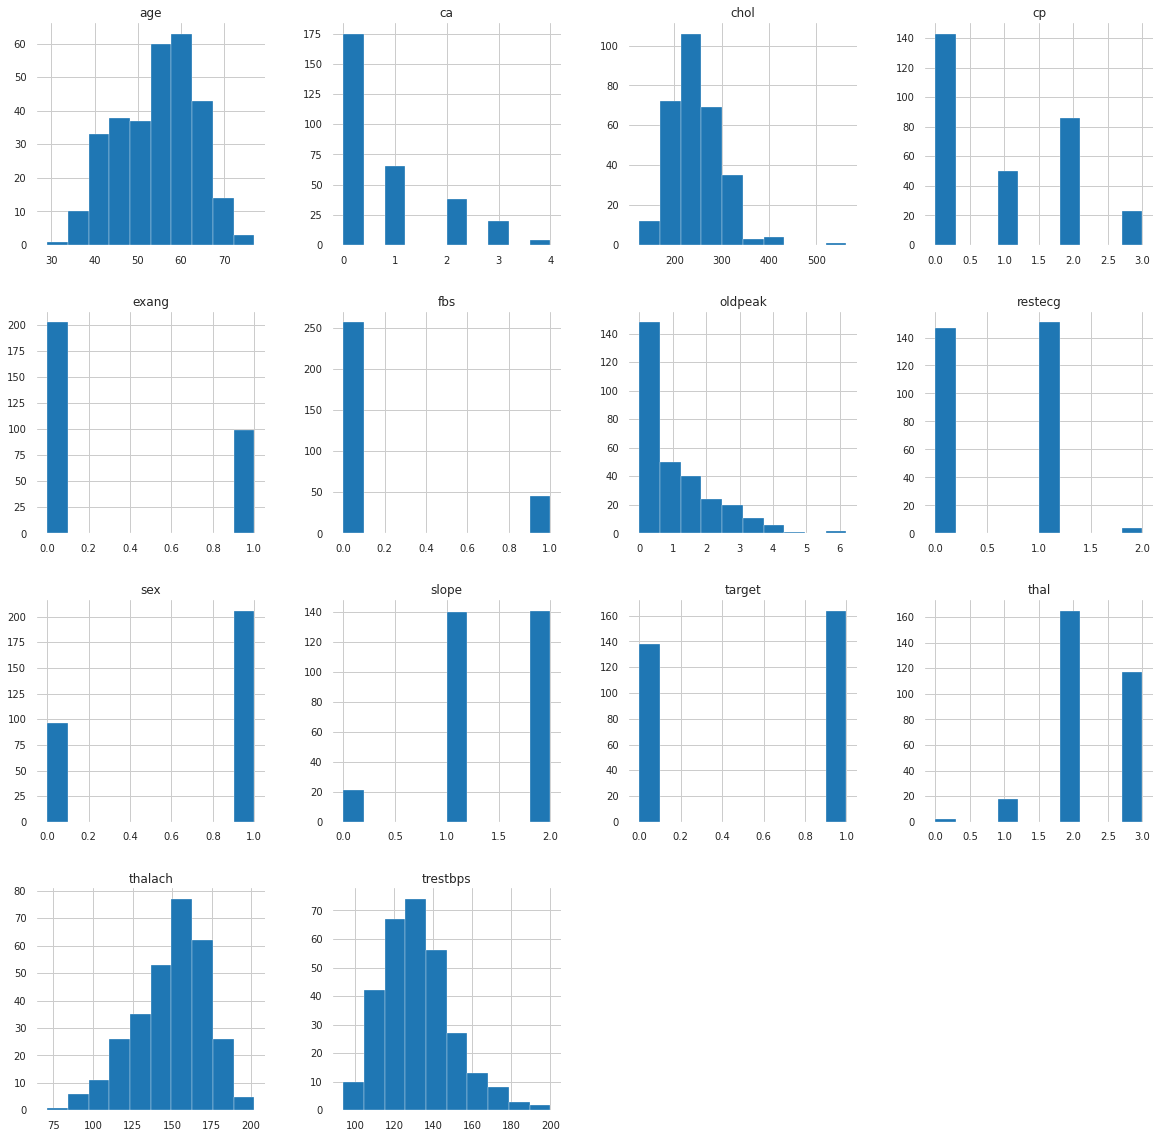

In [11]:
# The columns are ok. Let's plot a histogram for all the features
heart.hist(figsize=(20,20))

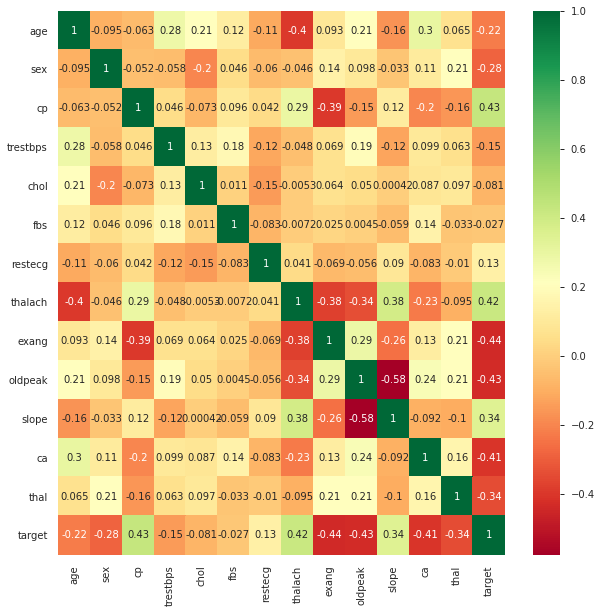

In [12]:
# Correlation of the data

x = heart.iloc[:,:]
y = heart.iloc[:, 0]
corrmat = heart.corr()
top_features = corrmat.index
plt.figure(figsize=(10,10))
matrix =sns.heatmap(heart[top_features].corr(),annot=True,cmap="RdYlGn")

From the above, we can see that fbs is the least correlated to the target, hence we can delete it. 


In [13]:
heart.drop('fbs', axis = 1 , inplace = True)

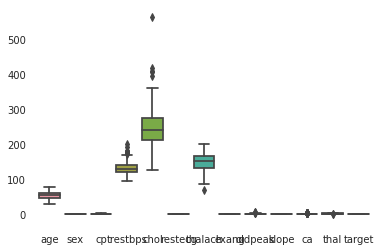

In [14]:
# Let's check for anomalies

sns.boxplot(data = heart)

There are outliers in thalach, trestbps and chol. We must deal with this.

In [15]:


#For thalach, we delete the outlier

#For cholestrol, we group the data

heart.loc[heart['chol']<220, 'chol']=0

heart.loc[heart['chol']>220, 'chol']=1

# We do the same for trestbps

heart.loc[heart['trestbps']<=90, 'trestbps']=0
heart.loc[(heart['trestbps']>90) & (heart['trestbps']<=120), 'trestbps']=1
heart.loc[(heart['trestbps']<=140) & (heart['trestbps']>120) , 'trestbps']=2
heart.loc[heart['trestbps']>140 , 'trestbps']=3



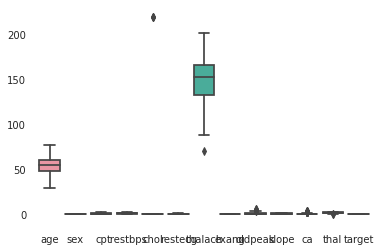

In [16]:
sns.boxplot(data = heart)

In [17]:
# Thalach
# heart = heart[(z < 3).all(axis=1)]

## Feature engineering
We normalize the thalach and age columns

How, When and Why Should You Normalize / Standardize / Rescale Your Data? :https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

In [18]:
# Thalach

#ex = heart['thalach'].values
#ex =ex.reshape((-1,1))
#from sklearn import preprocessing
#mm_scaler = preprocessing.MinMaxScaler()

#ex_scaled = mm_scaler.fit_transform(ex)
#heart['thalach'] = pd.DataFrame(ex_scaled)

#Age

#why = heart['age'].values
#why = why.reshape((-1,1))
#why_scaled = mm_scaler.fit_transform(why)
#heart['age'] = pd.DataFrame(why_scaled)

#thalach

normalized_th=(heart['thalach']-heart['thalach'].mean())/heart['thalach'].std()
heart['thalach']=normalized_th

#Age
normalized_age=(heart['age']-heart['age'].mean())/heart['age'].std()
heart['age']=normalized_age

In [19]:
heart.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.948220,1,3,3,1,0,0.018795,0,2.3,0,0,1,1
1,-1.925352,1,2,2,1,1,1.634266,0,3.5,0,0,2,1
2,-1.483264,0,1,2,0,0,0.979345,0,1.4,2,0,2,1
3,0.174566,1,1,1,1,1,1.241314,0,0.8,2,0,2,1
4,0.285088,0,0,1,1,1,0.586393,1,0.6,2,0,2,1


In [20]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
#Missing value in thalach
heart['thalach'].replace(np.nan,heart['thalach'].median())

#Missing value in age
heart['age'].fillna(heart['age'].median())

0      0.948220
1     -1.925352
2     -1.483264
3      0.174566
4      0.285088
         ...   
298    0.285088
299   -1.041176
300    1.500831
301    0.285088
302    0.285088
Name: age, Length: 302, dtype: float64

In [22]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Model Development

In [23]:
x = heart.drop('target', axis = 1)
y = heart['target']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [25]:
#Logistic Regression
#Call the model
lr = LogisticRegression()

#Train
lr.fit(x_train,y_train)

#Predict
lr_pred = lr.predict(x_test)

# Check accuracy

print(classification_report(y_test,lr_pred))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [26]:
#random Forest
#Call the model
rf = RandomForestClassifier()

#Train
rf.fit(x_train,y_train)

#Predict
rf_pred = rf.predict(x_test)

# Check accuracy

print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Random Forest was the best model, giving an accuracy of **85%**